In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

In [3]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [9]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    if df[col].isnull().sum() > 0:   # only handle if missing values exist
        if not df[col].mode().empty: # check mode is not empty
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna("Unknown", inplace=True)

In [10]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")


Removed 112 duplicate rows.


In [11]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


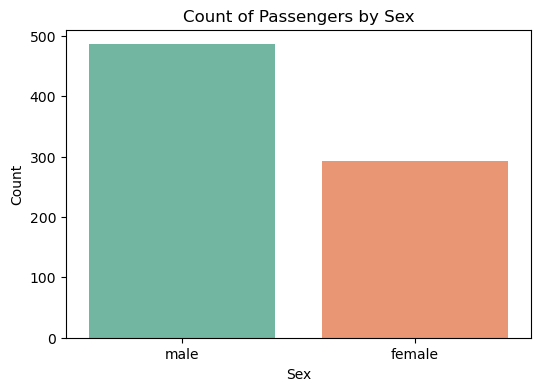

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sex", hue="sex", dodge=False, palette="Set2", legend=False)
plt.title("Count of Passengers by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

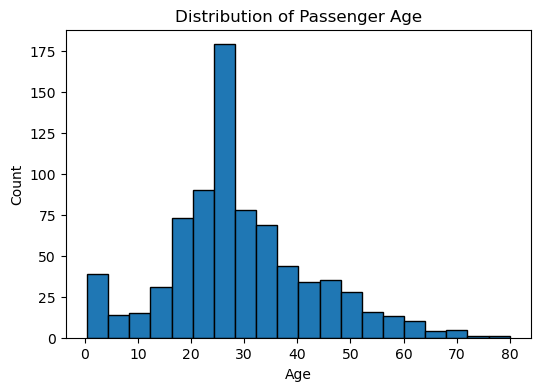

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df["age"], bins=20, edgecolor="black")
plt.title("Distribution of Passenger Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

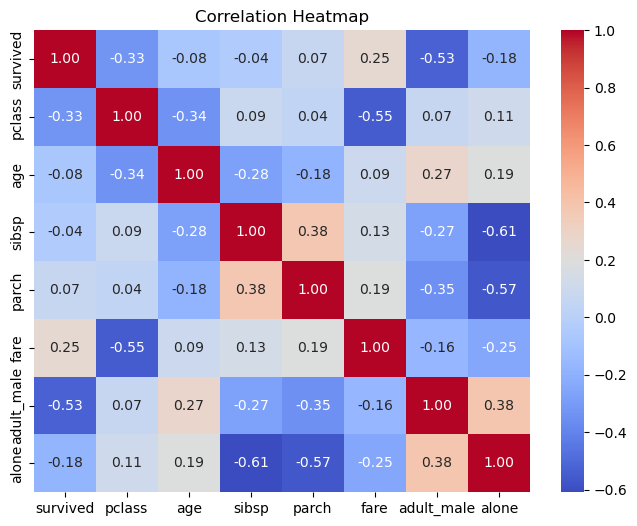

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
print("\nKey Insights:")
print("1. The dataset has more male passengers than female.")
print("2. Most passengers were in the younger to middle-age range (20–40 years).")
print("3. Survival is positively correlated with 'fare' and negatively correlated with 'age'.")
print("4. Duplicate entries were minimal, and missing values were successfully handled.")


Key Insights:
1. The dataset has more male passengers than female.
2. Most passengers were in the younger to middle-age range (20–40 years).
3. Survival is positively correlated with 'fare' and negatively correlated with 'age'.
4. Duplicate entries were minimal, and missing values were successfully handled.
